### <a id='sec'> Содержание: </a>
1. [Описание задания](#sec1)
2. [Описание данных](#sec2)
3. [Загрузка выборки и первичный анализ данных](#sec3)
4. [Предобработка данных](#sec4)
5. [Начало работы с моделями](#sec5)
6. [Оценка качества различных моделей](#sec6)
7. [Выводы](#sec6)

### <a id='sec1'> Описание задания </a>

**Problem 1.**

В качестве домашнего задания вам предлагается поработать над предсказанием погоды в Австралии. Файл с данными вы найдете в соответствующей директории. Вам будет доступен датасет weatherAUS.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.

Требуется построить 3 модели которые будут предсказывать целевую переменную RainTomorrow:

    С помощью Байесовских классификаторов
    С помощью логистической регрессии
    С помощью метода ближайших соседей

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.
В конце ноутбука должны быть четко описаны полученные результаты и метрики.

Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.

[вернуться в содержание](#sec)

### <a id='sec2'> Описание данных </a>

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра
    
[вернуться в содержание](#sec)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from time import time

### <a id='sec3'> Загрузка выборки и первичный анализ данных </a>

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

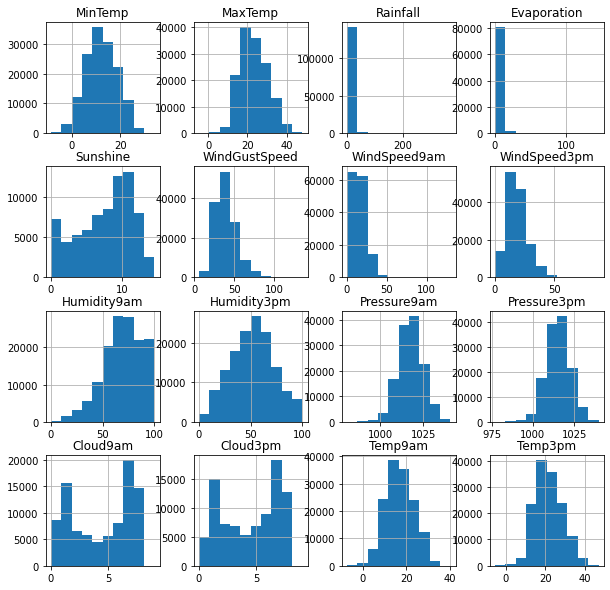

In [6]:
df.hist(figsize=(10, 10));

**Вывод:** данные требуют предобработки: необходимо разобраться с пропусками в данных (где-то, возможно, просто удалить, где-то обработать), привести к необходимым типам данных, найти коррелированные признаки.

[вернуться в содержание](#sec)

### <a id='sec4'> Предобработка данных </a>

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Удалим пропущенные значения в признаках, которые требуют предсказания.

In [9]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df.RainToday.isna().sum()

3261

In [12]:
df.RainTomorrow.isna().sum()

3267

In [13]:
df = df.dropna(subset=['RainToday', 'RainTomorrow'])

In [14]:
df.RainToday.isna().sum()

0

In [15]:
df.RainTomorrow.isna().sum()

0

In [16]:
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [17]:
df.RainTomorrow.value_counts()

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

Заменим "Yes", "No" на 1 и 0 в RainToday, RainTomorrow, чтобы сделать признаки не категориальными, а количественными. Приведем дату к нужному формату.

In [18]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df['RainToday'] = df.RainToday.apply(lambda f: 1 if f == 'Yes' else 0)
df['RainTomorrow'] = df.RainTomorrow.apply(lambda f: 1 if f == 'Yes' else 0)

Вычленим из даты все ее составляющие.

In [19]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [20]:
df.sort_values('Date', inplace=True)

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,1015.0,7.0,7.0,14.4,23.6,0,1,2007,11,1
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,1008.4,5.0,3.0,17.5,25.7,1,1,2007,11,2
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,1007.2,8.0,7.0,15.4,20.2,1,1,2007,11,3
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,1007.0,2.0,7.0,13.5,14.1,1,1,2007,11,4
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,1018.5,7.0,7.0,11.1,15.4,1,0,2007,11,5


После выстраивания данных в нужном порядке (по возрастанию даты), удалим категориальные признаки: дату и локацию.

In [22]:
df.drop(['Date', 'Location'], axis=1, inplace=True)

Найдем коррелированные признаки.

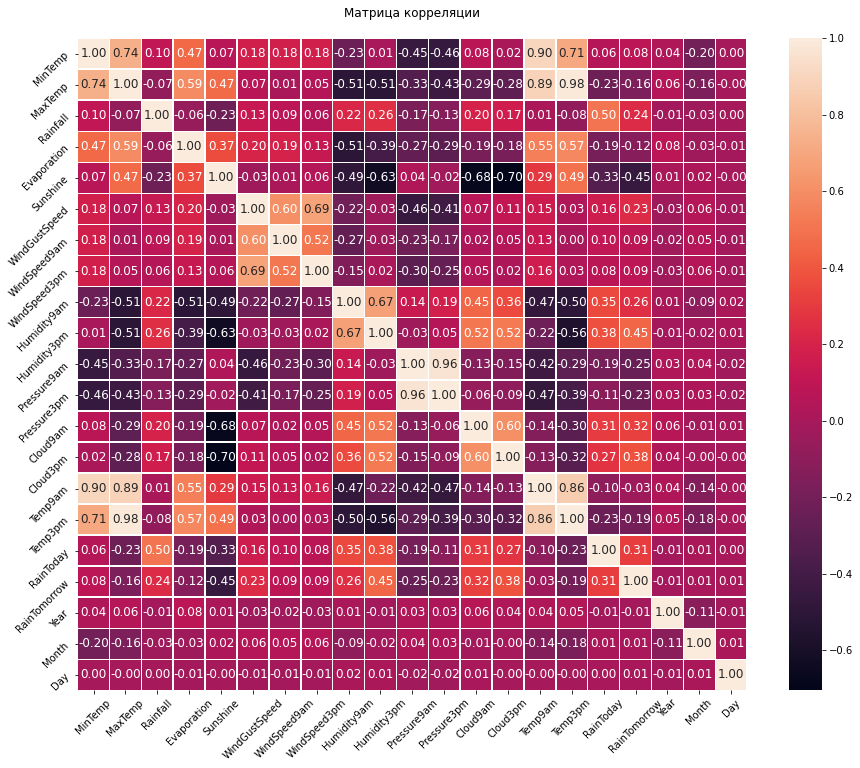

In [23]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f",
            annot_kws={'fontsize': 12})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Матрица корреляции\n');

In [24]:
# более точные значения коэффициентов корреляции Пирсона
display(df.corr())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
MinTemp,1.000000,0.736015,0.104255,0.467147,0.073078,0.177927,0.175775,0.175835,-0.234441,0.005686,...,-0.462099,0.077367,0.020268,0.901828,0.708716,0.056185,0.084322,0.037466,-0.204058,0.001055
MaxTemp,0.736015,1.000000,-0.074839,0.588934,0.470221,0.068510,0.014468,0.051178,-0.506109,-0.509916,...,-0.427069,-0.290217,-0.279261,0.887038,0.984565,-0.228884,-0.159405,0.056025,-0.164718,-0.000634
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,...,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.500997,0.239032,-0.009284,-0.030863,0.001134
Evaporation,0.467147,0.588934,-0.064549,1.000000,0.366659,0.203396,0.194398,0.129166,-0.506055,-0.393149,...,-0.293098,-0.185211,-0.184395,0.545382,0.574311,-0.187975,-0.119133,0.084224,-0.027765,-0.008158
Sunshine,0.073078,0.470221,-0.227525,0.366659,1.000000,-0.032196,0.009188,0.056480,-0.492784,-0.629638,...,-0.020276,-0.675846,-0.704621,0.291364,0.490386,-0.330635,-0.451820,0.011846,0.024081,-0.001388
WindGustSpeed,0.177927,0.068510,0.133497,0.203396,-0.032196,1.000000,0.604513,0.686881,-0.215117,-0.026631,...,-0.412879,0.071186,0.109340,0.150574,0.033511,0.155490,0.234285,-0.032911,0.060502,-0.009456
WindSpeed9am,0.175775,0.014468,0.086816,0.194398,0.009188,0.604513,1.000000,0.519980,-0.270564,-0.031638,...,-0.174497,0.024111,0.053369,0.129108,0.004878,0.102267,0.089803,-0.022538,0.051222,-0.009174
WindSpeed3pm,0.175835,0.051178,0.057759,0.129166,0.056480,0.686881,0.519980,1.000000,-0.145967,0.016011,...,-0.254951,0.052370,0.024769,0.163972,0.028845,0.080074,0.086762,-0.033254,0.060721,-0.010162
Humidity9am,-0.234441,-0.506109,0.223725,-0.506055,-0.492784,-0.215117,-0.270564,-0.145967,1.000000,0.668002,...,0.186515,0.452298,0.358273,-0.473305,-0.500528,0.353358,0.257727,0.011333,-0.090686,0.015408
Humidity3pm,0.005686,-0.509916,0.255312,-0.393149,-0.629638,-0.026631,-0.031638,0.016011,0.668002,1.000000,...,0.051244,0.517394,0.523186,-0.222227,-0.558562,0.378766,0.447834,-0.009024,-0.018231,0.013206


**Шкала Чеддока** (для характеристики степени тесноты связи):

* 0.1 - 0.3 - слабая 
* 0.3 - 0.5 - умеренная 
* 0.5 - 0.7 - заметная 
* 0.7 - 0.9 - высокая 
* 0.9 - 0.99 - сильная 
* 0.99 - 1 - функциональная 

По матрице корреляции определим коррелированные признаки (возьмем те, где коэффициент корреляции Пирсона $\geqslant$ 0.9):
* Temp3pm
* Temp9am
* MaxTemp
* MinTemp
* Pressure9am
* Pressure3pm

In [25]:
corr_features = ['Temp3pm', 
                 'Temp9am', 
                 'MaxTemp', 
                 'MinTemp', 
                 'Pressure9am', 
                 'Pressure3pm']

In [26]:
df.drop(corr_features, axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 45587 to 9057
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Rainfall       140787 non-null  float64
 1   Evaporation    81093 non-null   float64
 2   Sunshine       73982 non-null   float64
 3   WindGustDir    131624 non-null  object 
 4   WindGustSpeed  131682 non-null  float64
 5   WindDir9am     131127 non-null  object 
 6   WindDir3pm     137117 non-null  object 
 7   WindSpeed9am   139732 non-null  float64
 8   WindSpeed3pm   138256 non-null  float64
 9   Humidity9am    139270 non-null  float64
 10  Humidity3pm    137286 non-null  float64
 11  Cloud9am       88162 non-null   float64
 12  Cloud3pm       84693 non-null   float64
 13  RainToday      140787 non-null  int64  
 14  RainTomorrow   140787 non-null  int64  
 15  Year           140787 non-null  int64  
 16  Month          140787 non-null  int64  
 17  Day            140787 non-n

Большое число пропусков находится в следующих признаках: 
* Evaporation
* Sunshine
* Cloud9am
* Cloud3pm

Вряд ли мы сможем предугадать, чем эти пропуски заменить, поэтому удалим эти признаки из рассмотрения.

In [28]:
lots_nulls = ['Evaporation', 
              'Sunshine', 
              'Cloud9am', 
              'Cloud3pm']

In [29]:
df.drop(lots_nulls, axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 45587 to 9057
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Rainfall       140787 non-null  float64
 1   WindGustDir    131624 non-null  object 
 2   WindGustSpeed  131682 non-null  float64
 3   WindDir9am     131127 non-null  object 
 4   WindDir3pm     137117 non-null  object 
 5   WindSpeed9am   139732 non-null  float64
 6   WindSpeed3pm   138256 non-null  float64
 7   Humidity9am    139270 non-null  float64
 8   Humidity3pm    137286 non-null  float64
 9   RainToday      140787 non-null  int64  
 10  RainTomorrow   140787 non-null  int64  
 11  Year           140787 non-null  int64  
 12  Month          140787 non-null  int64  
 13  Day            140787 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 16.1+ MB


In [31]:
df.isna().sum()

Rainfall            0
WindGustDir      9163
WindGustSpeed    9105
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am     1055
WindSpeed3pm     2531
Humidity9am      1517
Humidity3pm      3501
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

В количественных признаках заменим пропуски на медиану как на статистику, не сильно чувствительную к выбросам.

In [32]:
numerical_features = ['WindGustSpeed', 
                      'WindSpeed9am', 
                      'WindSpeed3pm', 
                      'Humidity9am', 
                      'Humidity3pm']

In [33]:
for feature in numerical_features:
    df[feature].fillna(df[feature].median(), inplace=True)

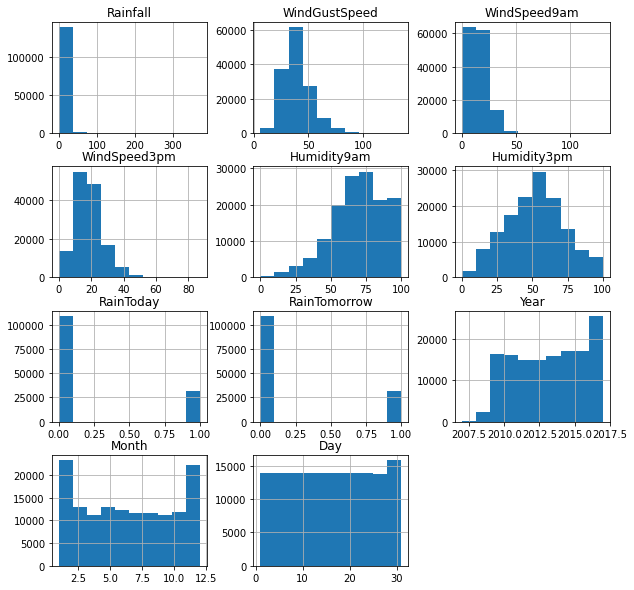

In [34]:
df.hist(figsize=(10, 10));

In [35]:
df.isna().sum()

Rainfall            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

One-hot encoding-ом обработаем категориальные величины.

In [36]:
categorical_features = ['WindGustDir', 
                        'WindDir9am', 
                        'WindDir3pm']

In [37]:
# one-hot encoding
one_hot = pd.get_dummies(df[categorical_features], drop_first=True)
df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
df = pd.concat([df, one_hot], axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 45587 to 9057
Data columns (total 56 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall         140787 non-null  float64
 1   WindGustSpeed    140787 non-null  float64
 2   WindSpeed9am     140787 non-null  float64
 3   WindSpeed3pm     140787 non-null  float64
 4   Humidity9am      140787 non-null  float64
 5   Humidity3pm      140787 non-null  float64
 6   RainToday        140787 non-null  int64  
 7   RainTomorrow     140787 non-null  int64  
 8   Year             140787 non-null  int64  
 9   Month            140787 non-null  int64  
 10  Day              140787 non-null  int64  
 11  WindGustDir_ENE  140787 non-null  uint8  
 12  WindGustDir_ESE  140787 non-null  uint8  
 13  WindGustDir_N    140787 non-null  uint8  
 14  WindGustDir_NE   140787 non-null  uint8  
 15  WindGustDir_NNE  140787 non-null  uint8  
 16  WindGustDir_NNW  140787 non-null  ui

**Вывод:** данные готовы к дальнейшему построению модели по ним.

[вернуться в содержание](#sec)

### <a id='sec5'> Начало работы с моделями </a>

Выделяем оцениваемый признак RainTomorrow. Делим выборку на test и train, где объем тестовой выборки составит 25% от объема общей выборки.

In [39]:
y = df.RainTomorrow

In [40]:
X = df.drop(['RainTomorrow'], axis=1)

In [41]:
X.head()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,Year,Month,Day,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
45587,0.0,30.0,6.0,20.0,68.0,29.0,0,2007,11,1,...,0,1,0,0,0,0,0,0,0,0
45588,3.6,39.0,4.0,17.0,80.0,36.0,1,2007,11,2,...,0,0,0,0,0,0,0,1,0,0
45589,3.6,85.0,6.0,6.0,82.0,69.0,1,2007,11,3,...,0,0,0,0,0,0,0,0,0,0
45590,39.8,54.0,30.0,24.0,62.0,56.0,1,2007,11,4,...,0,0,0,0,0,0,0,1,0,0
45591,2.8,50.0,20.0,28.0,68.0,49.0,1,2007,11,5,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.25, shuffle=False)

In [43]:
X_train.shape

(105590, 55)

In [44]:
X_test.shape

(35197, 55)

[вернуться в содержание](#sec)

### <a id='sec6'> Оценка качества различных моделей </a>

Выберем следующие модели: 
* Байесовские классификаторы:
    * Наивный байесовский классификатор
    * Гауссовский наивный байесовский классификатор
    * Мультиномиальный наивный байесовский классификатор
* Логистическая регрессия (максимальное число итераций = 5000)
* Метод ближайших соседей (с параметром 19)

Оценим время обучения каждой модели, а также время, за которое каждая модель делает предсказание. 

Также оценим качество моделей по следующим метрикам:
* Accuracy
* Precision
* Recall
* F1-measure

In [45]:
models = {'BernoulliNB' : BernoulliNB(),
          'MultinomialNB' : MultinomialNB(),
          'GaussianNB' : GaussianNB(),
          'LogisticRegression' : LogisticRegression(penalty='l2', max_iter=5000), 
          'KNeighborsClassifier' : KNeighborsClassifier(19)}


def fit_predict(models, X_train, y_train, X_test, y_test):
    np.random.seed(4)
    predictions = []
    fit_time = []
    predict_time = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i, model in models.items():

        start_fit = []
        end_fit = []
        end_predict = []
        
        start_fit = time()
        model.fit(X_train, y_train)
        end_fit = time()
        predictions = model.predict(X_test)
        end_predict = time()
        
        fit_time.append(round(end_fit - start_fit, 3))
        predict_time.append(round(end_predict - end_fit, 3))
        
        accuracy_scores.append(round(accuracy_score(y_test, predictions), 3))
        precision_scores.append(round(precision_score(y_test, predictions), 3))
        recall_scores.append(round(recall_score(y_test, predictions), 3))
        f1_scores.append(round(f1_score(y_test, predictions), 3))
    
    results = pd.DataFrame(data=[accuracy_scores, 
                                 precision_scores, 
                                 recall_scores, 
                                 f1_scores, 
                                 fit_time, 
                                 predict_time], 
                           columns=models.keys(), 
                           index=['Accuracy', 
                                  'Precision', 
                                  'Recall', 
                                  'F1-measure', 
                                  'Fitting time', 
                                  'Predicting time'])
    
    return results

In [46]:
results = fit_predict(models, X_train, y_train, X_test, y_test)

In [47]:
results

,BernoulliNB,MultinomialNB,GaussianNB,LogisticRegression,KNeighborsClassifier
Accuracy,0.759,0.796,0.724,0.836,0.834
Precision,0.449,0.533,0.408,0.708,0.703
Recall,0.418,0.598,0.565,0.437,0.423
F1-measure,0.433,0.563,0.474,0.541,0.528
Fitting time,0.181,0.060,0.184,5.777,0.037
Predicting time,0.066,0.023,0.060,0.018,210.228


[вернуться в содержание](#sec)

### <a id='sec7'> Выводы </a>

Наилучшего качества по: 
* *Accuracy (0.836), Precision (0.708)* достигла модель **LogisticRegression**,
* *Recall (0.598), F1-measure (0.563)* достигла модель **MultinomialNB**.

При этом лучшее время обучения модели у **KNeighborsClassifier (параметр = 19)** *(составило 0.037 секунд)*, а время предсказания лучше всего у **MultinomialNB, LogisticRegression** *(примерно 0.018 секунд)*. 

Худшее качество по:
* *Accuracy (0.724), Precision (0.408)* у **GaussianNB**,
* *Recall (0.418), F1-measure (0.433)* у **BernoulliNB**.

Худшее время, за которое обучается модель, показала **LogisticRegression** *(примерно 5.78 секунд)*, предсказывает дольше других **KNeighborsClassifier (параметр = 19)** *(приблизительно 3.50 минуты).*

**Вывод:** оптимальным будет выбор моделей **MultinomialNB, LogisticRegression** как по качеству (пусть будем судить по *Precision* и *Recall*, так как *Accuracy* чувствительна к дисбалансу классов), так и по времени.

[вернуться в содержание](#sec)